# 1. Get Toy Data
- Let's generate a simple toy data set representing web-session data
    - with 3 different classes
    - with simple intuitive features
        - Other than some super simple dummy-encoding of categoricals, we won't go into feature engineering

imports

In [1]:
# for plottign
import matplotlib.pyplot as plt
# for numerical transformations
import numpy as np
# for data frame (i.e. table) manipulations
import pandas as pd
# to easily generate a data set with a classification signal in it
from sklearn.datasets import make_classification

notebook variables

In [2]:
# declare whether or not to print some feedback
verbose = True

I'd like to start with the following columns

In [3]:
# initialize a empty data frame
web_sesh_df = pd.DataFrame(
    # declare the column headers with empty columns for now
    data = {
        # hour of day (0-24) as float
        'start_time':[],
        # weekday (0-7) treat as int (although it should properly be understood as a categorical)
        'weekday':[],
        # boolean indicator of whether or not the session is on a chrome browser
        'chrome_browser':[],
        # boolean indicator of whether or not the session is on a firefox browser
        'firefox_browser':[],
        # boolean indicator of whether or not the session is on a mobile device
        'mobile_device':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_faq':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_faq':[],
        # the last page a session interacted with; and the prediction target
        'TARGET_PAGE':[]
        
    }
)

# display the column headers
if verbose:
    feedback = 'Initialized web-session data-frame with info:\n'
    feedback += '-'*len(feedback)
    print(feedback)
    print(web_sesh_df.info())

Initialized web-session data-frame with info:
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       0 non-null      float64
 1   weekday          0 non-null      float64
 2   chrome_browser   0 non-null      float64
 3   firefox_browser  0 non-null      float64
 4   mobile_device    0 non-null      float64
 5   1st_page_search  0 non-null      float64
 6   1st_page_faq     0 non-null      float64
 7   2nd_page_search  0 non-null      float64
 8   2nd_page_faq     0 non-null      float64
 9   TARGET_PAGE      0 non-null      float64
dtypes: float64(10)
memory usage: 124.0 bytes
None


Note the data-frame is currently empty

In [4]:
web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE


## Ok, let's epxlore how `make_classification` works
**Start with something simple**

In [5]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 1000,
    # only two features for 2d plotting
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 1,
    n_clusters_per_class = 1,
)

In [6]:
# take a look at the first 5 samples
X[:5]

array([[ 1.53682958, -1.39869399],
       [ 1.36917601, -0.63734411],
       [ 0.50231787, -0.45910529],
       [ 1.83319262, -1.29808229],
       [ 1.04235568,  1.12152929]])

In [7]:
# take a look at the first 5 samples
X[:5, 0]

array([1.53682958, 1.36917601, 0.50231787, 1.83319262, 1.04235568])

In [8]:
y[:5]

array([1, 1, 1, 1, 0])

In [9]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,1.536830,-1.398694,1
1,1.369176,-0.637344,1
2,0.502318,-0.459105,1
3,1.833193,-1.298082,1
4,1.042356,1.121529,0


**plot what the generated classes look like in 2d space**

[]

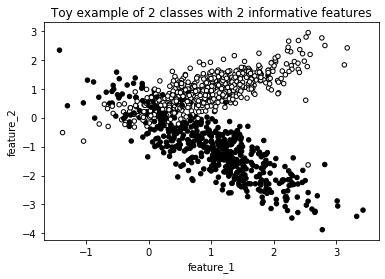

In [10]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
)
plt.title('Toy example of 2 classes with 2 informative features')
plt.plot()

### repeat the vis but with 2 clusters per class

In [11]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 5000,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 1,
    n_clusters_per_class = 2,
)

In [12]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,-0.875616,-0.977599,1
1,-0.541799,1.038633,0
2,-0.713956,-1.173781,0
3,0.463707,-1.121944,1
4,-1.581774,2.230862,0


[]

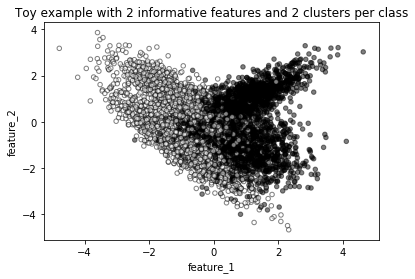

In [13]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
    alpha = .5
)
plt.title('Toy example with 2 informative features and 2 clusters per class')
plt.plot()

Ok. Now that we're comfortable with how `make_classification` works, 
## let's generate the toy data to fit my empty data frame

Generate some toy data to put into the data frame

In [14]:
# Generate some toy data to put into the data frame
X,y = make_classification(
    # generate 100,000 rows
    n_samples = 300,
    # set the number of features to the width of the data minus the target column
    n_features = web_sesh_df.shape[1] - 1,
    # let's assume all the columns are informative except for the two browser features, so that's 7
    n_informative = 7,
    # declare number of target pages/classes to predict (keep it simple at 3)
    n_classes = 3,
    # declare the number of clusters per class
    n_clusters_per_class = 1,
    # declare how easty to make the classification task (larger is easier)
    class_sep = 1.5,
    # set random seed for reproducibility
    random_state = 1
)

# unpack each column in X into columns of a data frame
for i in range(X.shape[1]):
    # get the corresponding column in the data frame
    col = web_sesh_df.columns[i]
    # assign the column in X to the column in the df
    web_sesh_df[col] = X[:,i]

# assign the target column
web_sesh_df['TARGET_PAGE'] = y
    
# take a look at the data now
web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
0,-2.512761,2.849728,-1.341746,-2.236929,-1.570451,-4.353039,-2.433338,-0.752993,2.443055,1
1,1.791584,0.490666,0.131259,-1.167027,-2.835777,1.655398,0.033763,0.918596,1.094318,2
2,-1.935616,2.310886,0.055705,-1.383175,2.011366,-2.972686,-1.532550,-2.156360,-0.201319,1
3,-3.490736,3.280679,1.535676,-4.111990,1.487855,-9.452995,-0.815728,1.846390,3.201373,1
4,0.116062,0.331729,-2.758988,0.820280,5.656500,-1.211446,-1.269460,-6.691451,-0.010707,1


In [15]:
# display the data frames info now
web_sesh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       300 non-null    float64
 1   weekday          300 non-null    float64
 2   chrome_browser   300 non-null    float64
 3   firefox_browser  300 non-null    float64
 4   mobile_device    300 non-null    float64
 5   1st_page_search  300 non-null    float64
 6   1st_page_faq     300 non-null    float64
 7   2nd_page_search  300 non-null    float64
 8   2nd_page_faq     300 non-null    float64
 9   TARGET_PAGE      300 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 23.6 KB


Cool! Note that I won't be trying to make any plots because the data is now 9 dimensional.

## manipulate the values so they make intuitive sense according to their column headers

In [16]:
# take a look at the summary
web_sesh_df.describe()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.627651,1.365010,-0.063963,0.538765,0.549948,-1.742049,0.478875,-0.582291,0.508629,1.010000
std,2.382041,1.568247,2.013020,1.922904,2.220617,4.253595,2.007415,2.336779,2.248041,0.819842
min,-6.298082,-3.117534,-4.840822,-4.360543,-6.044592,-14.890643,-5.624413,-6.691451,-6.088136,0.000000
25%,-2.261912,0.286666,-1.451809,-0.916639,-0.936339,-4.577918,-0.929558,-2.346305,-1.054337,0.000000
50%,-0.878254,1.230339,-0.412803,0.757305,0.685153,-2.086243,0.605229,-0.727234,0.663450,1.000000
75%,0.761057,2.560427,1.140972,1.953515,2.167821,1.179694,1.855103,0.934496,2.081063,2.000000
max,5.773768,6.335881,5.332416,5.607530,6.581874,12.373349,5.748204,5.361299,8.788658,2.000000


**interpolate start_time on a 0-24 range, to represent hours in a day**

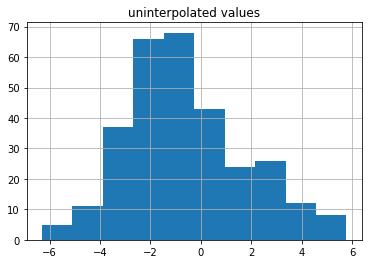

In [17]:
# take a look at its current distribution
web_sesh_df.start_time.hist()
plt.title('uninterpolated values')
plt.show()

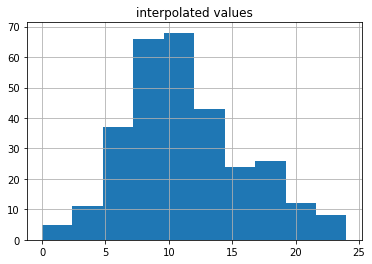

In [18]:
web_sesh_df['start_time'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df.start_time,
        # the min and max of the existing range
        xp = (web_sesh_df.start_time.min(), web_sesh_df.start_time.max()),
        # the min and max of the new range
        fp = (0,24),
    )
# display the output as a spot check
web_sesh_df['start_time'].hist()
plt.title('interpolated values')
plt.show()

**interpolate weekday to values from 1-7** I'll skip the plotting this time

In [19]:
# interpolate the values as floats
web_sesh_df['weekday'] = np.interp(
        # the array of values to interpolate
        x = web_sesh_df.weekday,
        # the min and max of the existing range
        xp = (web_sesh_df.weekday.min(), web_sesh_df.weekday.max()),
        # the min and max of the new range
        fp = (1,7),
    )
# convert the values to ints
web_sesh_df['weekday'] = web_sesh_df['weekday'].astype(int)

**ok, what's next?**

In [20]:
web_sesh_df.describe()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,11.273362,3.340000,-0.063963,0.538765,0.549948,-1.742049,0.478875,-0.582291,0.508629,1.010000
std,4.735727,1.043085,2.013020,1.922904,2.220617,4.253595,2.007415,2.336779,2.248041,0.819842
min,0.000000,1.000000,-4.840822,-4.360543,-6.044592,-14.890643,-5.624413,-6.691451,-6.088136,0.000000
25%,8.024295,3.000000,-1.451809,-0.916639,-0.936339,-4.577918,-0.929558,-2.346305,-1.054337,0.000000
50%,10.775140,3.000000,-0.412803,0.757305,0.685153,-2.086243,0.605229,-0.727234,0.663450,1.000000
75%,14.034247,4.000000,1.140972,1.953515,2.167821,1.179694,1.855103,0.934496,2.081063,2.000000
max,24.000000,7.000000,5.332416,5.607530,6.581874,12.373349,5.748204,5.361299,8.788658,2.000000


### interpolate the remaining features as booleans
hopefully this won't alter the clustering too much
- I think it will be fine since I'm just taking a continuous feature and basically drawing a line in the middle and makign it binary

In [21]:
# iterate throug the columns I want to interpolate to booleans
for col in [
    'chrome_browser', 'firefox_browser', 
    'mobile_device', 
    '1st_page_search', '1st_page_faq', 
    '2nd_page_search', '2nd_page_faq'
]:
    # transform them to the boolean series
    web_sesh_df[col] = web_sesh_df[col] >= web_sesh_df[col].median()

web_sesh_df.head()

,start_time,weekday,chrome_browser,firefox_browser,mobile_device,1st_page_search,1st_page_faq,2nd_page_search,2nd_page_faq,TARGET_PAGE
0,7.525582,4,False,False,False,False,False,False,True,1
1,16.083034,3,True,False,False,True,False,True,True,2
2,8.673003,4,True,False,True,False,False,False,False,1
3,5.581274,5,True,False,True,False,False,True,True,1
4,12.751936,3,False,True,True,True,False,False,False,1


## Ok. now let's see how well a random forest does on the data

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [23]:
# instantiate a model
classifier = RandomForestClassifier(
    max_depth=5, n_estimators=20
)

In [24]:
# split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(
    web_sesh_df.drop(columns = ['TARGET_PAGE']), web_sesh_df.TARGET_PAGE
)

# fit the classifier
classifier.fit(
    X_train, y_train
)
# score the classifier
score = classifier.score(X_test, y_test)
print(score)

0.8266666666666667


**take a look at the confusion matrix**, normalized

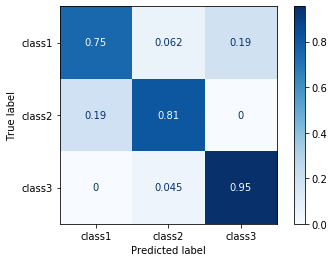

In [28]:
plot_confusion_matrix(
    classifier,
    X_test, y_test,
    display_labels = ['class1', 'class2', 'class3'],
    cmap = plt.cm.Blues,
    normalize = 'true'
)
plt.show()

**great! so we've established the synthetic data is modelable**